# AutoML: Neural Network

## Import Libraries

In [1]:
import h2o
from h2o.automl import H2OAutoML
from h2o.estimators import H2ODeepLearningEstimator
import pandas as pd

In [2]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,6 hours 12 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.4
H2O_cluster_version_age:,2 months and 6 days
H2O_cluster_name:,H2O_from_python_yashp_l033ke
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.313 Gb
H2O_cluster_total_cores:,12
H2O_cluster_allowed_cores:,12
H2O_cluster_status:,"locked, healthy"


### Load the dataset into H20 Dataframe

In [3]:
# Import the car price dataset into H2O
house_data = h2o.import_file("Housing.csv")

# View a summary of the dataset
house_data.head(10)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
1.33e+07,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1.225e+07,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
1.225e+07,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
1.2215e+07,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
1.141e+07,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
1.085e+07,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
1.015e+07,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
1.015e+07,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
9.87e+06,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9.8e+06,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


# Data Preprocessing

### Define Features and Target Variable

In [4]:
target = 'price'
features = house_data.columns
features.remove(target)

### Convert categorical columns to factors

In [5]:
categorical_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
for col in categorical_columns:
    house_data[col] = house_data[col].asfactor()

### Apply Log Transformation to the Target Variable

In [6]:
house_data[target] = house_data[target].log()

### Split Dataset into Training and Testing Sets

In [7]:
train, test = house_data.split_frame(ratios=[.7], seed=1234)

# Model Building

### Build and Train the H20 Deep Learning Model

In [8]:
# Build and train the deep learning model
dl_model = H2ODeepLearningEstimator(
    hidden=[100, 100],
    epochs=200,
    activation="rectifier",
    l1=1e-5,
    l2=1e-5,
    stopping_rounds=5,
    stopping_metric="RMSE",
    stopping_tolerance=1e-4,
    seed=1234,
    standardize=True
)
dl_model.train(x=features, y=target, training_frame=train)

deeplearning Model Build progress: |█████████████████████████████████████████████| (done) 100%


Model Details
=============
H2ODeepLearningEstimator : Deep Learning
Model Key: DeepLearning_model_python_1726476276668_6


Status of Neuron Layers: predicting price, regression, gaussian distribution, Quadratic loss, 13,001 weights/biases, 159.5 KB, 78,800 training samples, mini-batch size 1
    layer    units    type       dropout    l1     l2     mean_rate             rate_rms              momentum    mean_weight            weight_rms          mean_bias              bias_rms
--  -------  -------  ---------  ---------  -----  -----  --------------------  --------------------  ----------  ---------------------  ------------------  ---------------------  -----------------------
    1        27       Input      0.0
    2        100      Rectifier  0.0        1e-05  1e-05  0.26580054097043576   0.43360984325408936   0.0         -0.025096384323585005  0.1621178388595581  0.37865681753714014    0.080050528049469
    3        100      Rectifier  0.0        1e-05  1e-05  0.08130396266520257   0.10176151990890503   0.0         -0.0415180835054326    0.1320486068725586  0.768142903657004      0.1311824917793274
    4        1        Linear                1e-05  1e-05  0.003077178557869047  0.001652680803090334  0.0         -0.01172043511760421   0.1868622899055481  -0.039127801389331265  1.0971281125650402e-154

ModelMetricsRegression: deeplearning
** Reported on train data. **

MSE: 0.011281390139415103
RMSE: 0.10621388863710388
MAE: 0.06792989541369393
RMSLE: 0.006631895455209209
Mean Residual Deviance: 0.011281390139415103

Scoring History: 
    timestamp            duration    training_speed    epochs    iterations    samples    training_rmse    training_deviance    training_mae    training_r2
--  -------------------  ----------  ----------------  --------  ------------  ---------  ---------------  -------------------  --------------  -------------
    2024-09-16 19:33:26  0.000 sec                     0         0             0          nan              nan                  nan             nan
    2024-09-16 19:33:27  1.612 sec   3511 obs/sec      10        1             3940       0.227779         0.0518832            0.177354        0.60498
    2024-09-16 19:33:29  2.840 sec   33747 obs/sec     200       20            78800      0.106214         0.0112814            0.0679299       0.914108

Variable Importances: 
variable                         relative_importance    scaled_importance    percentage
-------------------------------  ---------------------  -------------------  --------------------
basement.yes                     1.0                    1.0                  0.057927763072457006
area                             0.9990872740745544     0.9990872740745544   0.05787489090129771
furnishingstatus.semi-furnished  0.9809980392456055     0.9809980392456055   0.056827021991964315
stories                          0.9358485341072083     0.9358485341072083   0.05421161215546856
bedrooms                         0.9185615181922913     0.9185615181922913   0.053210213993319454
bathrooms                        0.9023837447166443     0.9023837447166443   0.0522730717643823
mainroad.yes                     0.8773474097251892     0.8773474097251892   0.050822772882794624
guestroom.no                     0.8657166957855225     0.8657166957855225   0.05014903164133409
furnishingstatus.furnished       0.8647476434707642     0.8647476434707642   0.05009289660843995
furnishingstatus.unfurnished     0.8589885234832764     0.8589885234832764   0.04975928367029891
---                              ---                    ---                  ---
hotwaterheating.no               0.7872965931892395     0.7872965931892395   0.04560633051801884
basement.no                      0.7619107365608215     0.7619107365608215   0.04413578462985648
prefarea.no                      0.737417459487915      0.737417459487915    0.042716943878709106
furnishingstatus.missing(NA)     0.0                    0.0                  0.0
guestroom.missing(NA)            

# Model Evaluation

### Evaluate Model Performance On the Testing Set

In [9]:
performance = dl_model.model_performance(test)
print(performance)

ModelMetricsRegression: deeplearning
** Reported on test data. **

MSE: 0.06946215254193537
RMSE: 0.2635567349584058
MAE: 0.20686958380632517
RMSLE: 0.016144585252259026
Mean Residual Deviance: 0.06946215254193537


In [10]:
# Generate predictions on the test set
predictions = dl_model.predict(test)
print(predictions.head())

deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%
  predict
  15.828
  15.7157
  15.7685
  15.6171
  15.9698
  15.5309
  16.0424
  15.4846
  16.0919
  15.5768
[10 rows x 1 column]



### Hyperparameters and Feature Importance

In [18]:
# Extract and print the hyperparameters and feature importances
print(f"Hyperparameters of the model: {dl_model.params}")
print(f"Feature Importances: {dl_model.varimp()}")

Hyperparameters of the model: {'model_id': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'ModelKeyV3', 'schema_type': 'Key<Model>'}, 'name': 'DeepLearning_model_python_1725962924477_2', 'type': 'Key<Model>', 'URL': '/3/Models/DeepLearning_model_python_1725962924477_2'}, 'input': None}, 'training_frame': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'name': 'py_30_sid_a349', 'type': 'Key<Frame>', 'URL': '/3/Frames/py_30_sid_a349'}, 'input': {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'name': 'py_30_sid_a349', 'type': 'Key<Frame>', 'URL': '/3/Frames/py_30_sid_a349'}}, 'validation_frame': {'default': None, 'actual': None, 'input': None}, 'nfolds': {'default': 0, 'actual': 0, 'input': 0}, 'keep_cross_validation_models': {'default': True, 'actual': True, 'input': True}, 'keep_cross_validation_predictions': {'default': False, 'actual': False,

### Converting H20 Frame predictions into Pandas DataFrame

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

pred_df = predictions.as_data_frame()

C:\Users\yashp\AppData\Roaming\Python\Python311\site-packages\h2o\frame.py:1981: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


### Plotting Training and Validation Loss Over Epochs

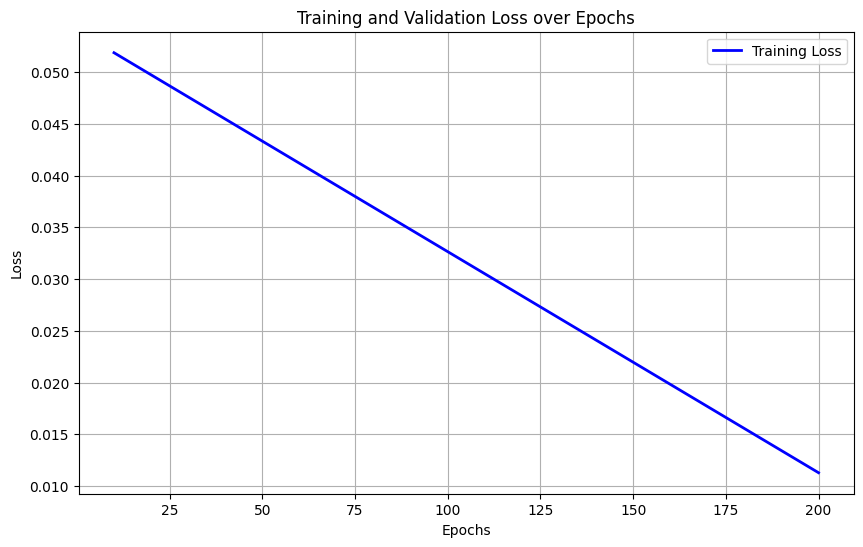

In [15]:
scoring_history = dl_model.scoring_history()

# Extract the relevant columns from the scoring history
epochs = scoring_history['epochs']
training_loss = scoring_history['training_deviance']  # Training loss

# Check if validation loss is available, otherwise skip it
if 'validation_deviance' in scoring_history.columns:
    validation_loss = scoring_history['validation_deviance']
else:
    validation_loss = None

# Plot the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(epochs, training_loss, label='Training Loss', color='blue', lw=2)

# Plot validation loss if available
if validation_loss is not None:
    plt.plot(epochs, validation_loss, label='Validation Loss', color='orange', lw=2)

plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


### Feature Importance plot

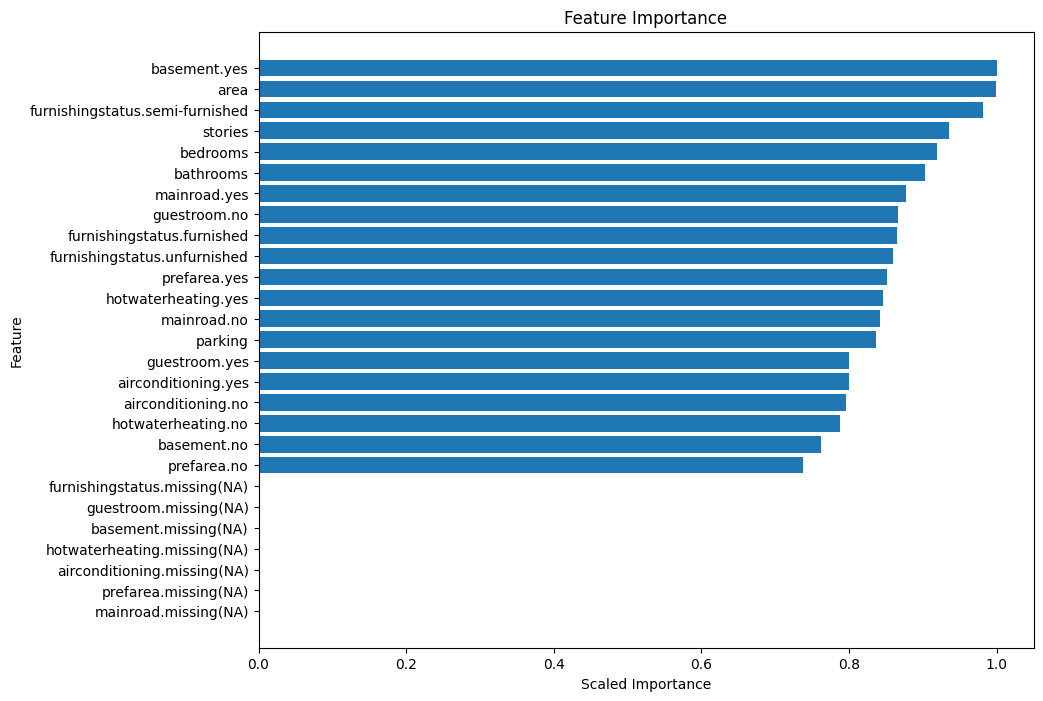

In [16]:
# Extract feature importances from the model
feature_importances = dl_model.varimp(use_pandas=True)

# Plot the feature importances
plt.figure(figsize=(10, 8))
plt.barh(feature_importances['variable'], feature_importances['scaled_importance'])
plt.xlabel('Scaled Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.show()


### Plotting the actual vs predicted values

C:\Users\yashp\AppData\Roaming\Python\Python311\site-packages\h2o\frame.py:1981: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
C:\Users\yashp\AppData\Roaming\Python\Python311\site-packages\h2o\frame.py:1981: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
C:\Users\yashp\AppData\Roaming\Python\Python311\site-packages\h2o\frame.py:1981: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For 

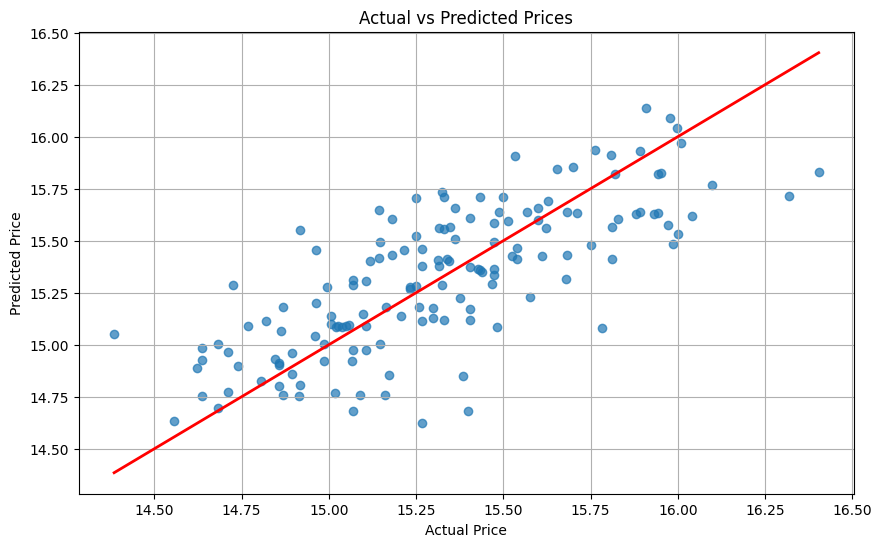

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(test[target].as_data_frame(), pred_df, alpha=0.7)
plt.plot([min(test[target].as_data_frame()[target]), max(test[target].as_data_frame()[target])], 
         [min(test[target].as_data_frame()[target]), max(test[target].as_data_frame()[target])], 
         color='red', linewidth=2)  # Line y=x
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.grid(True)
plt.show()


### Plot Residuals

C:\Users\yashp\AppData\Roaming\Python\Python311\site-packages\h2o\frame.py:1981: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


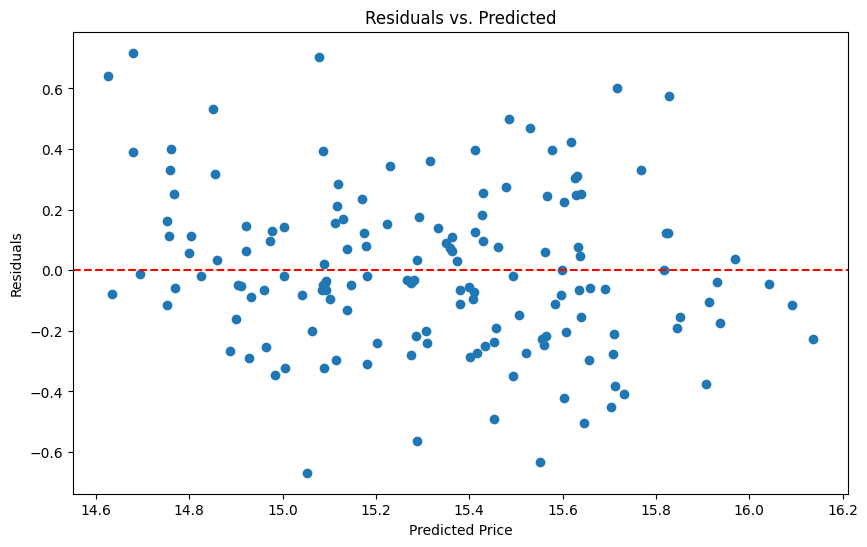

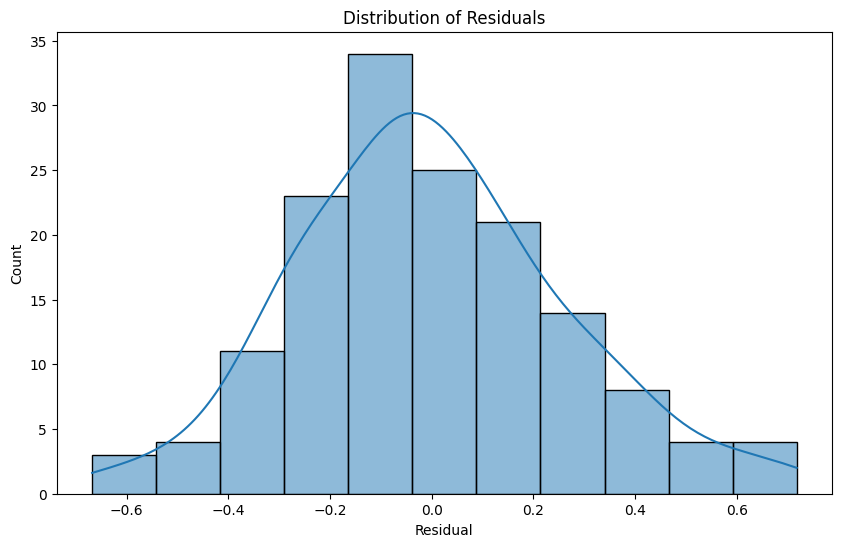

In [18]:
import seaborn as sns
# Actual values from the test set
actual_values = test[target].as_data_frame()

# Ensure that both DataFrames have the same index
pred_df.index = actual_values.index

# Calculate residuals
residuals = actual_values[target] - pred_df['predict']

# Residuals analysis
plt.figure(figsize=(10, 6))
plt.scatter(pred_df['predict'], residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted")
plt.show()

# Distribution of Residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()